In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


# Preparing the Data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tqdm

In [3]:
training_path = "./Training"
test_path = "./Test"

In [4]:
IMG_SIZE = 100
categories = os.listdir(training_path)
print(len(categories))


118


In [5]:
def prepare_data(folder_path):
    X = []
    y = []
    for category in tqdm.tqdm(os.listdir(folder_path)):
        path = os.path.join(folder_path, category)
        class_index = categories.index(category)
        for img_file in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img_file), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                X.append(new_array)
                y.append(class_index)
            except Exception:
                pass
    return np.array(X), np.array(y)
    

In [6]:
train_x, train_y = prepare_data(training_path)
test_x, test_y = prepare_data(test_path)

100%|████████████████████████████████████████████████████████████████████████████████| 118/118 [01:29<00:00,  1.19it/s]


In [7]:
print(train_x.shape, test_x.shape)

(59328, 100, 100, 3) (20232, 100, 100, 3)


In [8]:
print(train_y.shape, test_y.shape)

(59328,) (20232,)


In [9]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

In [10]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [11]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)

In [12]:
print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(53395, 100, 100, 3) (5933, 100, 100, 3) (53395, 118) (5933, 118)


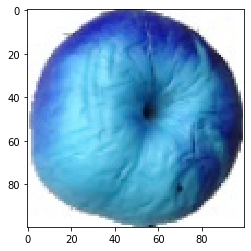

In [13]:
plt.imshow(train_x[0])

In [19]:
import pickle
with open('data.pkl', 'wb') as output:
    pickle.dump([train_x, train_y, val_x, val_y, test_x, test_y], output, pickle.HIGHEST_PROTOCOL)

# Training the Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [16]:
train_x.shape[1:]

(100, 100, 3)

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, input_shape=train_x.shape[1:], activation="relu", padding="same"))
model.add(Conv2D(filters = 32, kernel_size = 2, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = 2, activation="relu", padding="same"))
model.add(Conv2D(filters = 64, kernel_size = 2, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = 2, activation="relu", padding="same"))
model.add(Conv2D(filters = 128, kernel_size = 2, activation="relu", padding="same"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(categories), activation="softmax"))

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      416       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 128)      

In [21]:
history = model.fit(train_x, train_y, batch_size=256, epochs = 5, validation_data=(val_x, val_y))

Train on 53395 samples, validate on 5933 samples
Epoch 1/5


51968/53395 [============================>.] - ETA: 32:49 - loss: 4.7717 - acc: 0.00 - ETA: 31:41 - loss: 4.7650 - acc: 0.00 - ETA: 31:39 - loss: 4.7647 - acc: 0.00 - ETA: 30:25 - loss: 4.7620 - acc: 0.00 - ETA: 28:39 - loss: 4.7630 - acc: 0.00 - ETA: 27:03 - loss: 4.7625 - acc: 0.00 - ETA: 26:24 - loss: 4.7621 - acc: 0.00 - ETA: 25:53 - loss: 4.7605 - acc: 0.00 - ETA: 25:07 - loss: 4.7582 - acc: 0.01 - ETA: 24:32 - loss: 4.7539 - acc: 0.01 - ETA: 23:59 - loss: 4.7477 - acc: 0.01 - ETA: 23:32 - loss: 4.7402 - acc: 0.01 - ETA: 23:05 - loss: 4.7309 - acc: 0.01 - ETA: 22:42 - loss: 4.7234 - acc: 0.01 - ETA: 22:23 - loss: 4.7148 - acc: 0.01 - ETA: 22:02 - loss: 4.7008 - acc: 0.01 - ETA: 21:44 - loss: 4.6870 - acc: 0.02 - ETA: 21:28 - loss: 4.6746 - acc: 0.02 - ETA: 21:14 - loss: 4.6565 - acc: 0.02 - ETA: 21:01 - loss: 4.6393 - acc: 0.02 - ETA: 20:47 - loss: 4.6177 - acc: 0.02 - ETA: 20:45 - loss: 4.5971 - acc: 0.02 - ETA: 20:53 - loss: 4.5671 - acc: 0.03 - ETA: 20:53 - loss: 4.5392 - acc: 

53395/53395 [==============================] - ETA: 27s - loss: 1.2275 - acc: 0.68 - ETA: 21s - loss: 1.2223 - acc: 0.68 - ETA: 15s - loss: 1.2171 - acc: 0.68 - ETA: 9s - loss: 1.2124 - acc: 0.6862 - ETA: 3s - loss: 1.2072 - acc: 0.687 - 1286s 24ms/sample - loss: 1.2041 - acc: 0.6882 - val_loss: 0.0486 - val_acc: 0.9863
Epoch 2/5


52224/53395 [============================>.] - ETA: 21:00 - loss: 0.1492 - acc: 0.94 - ETA: 20:28 - loss: 0.1540 - acc: 0.94 - ETA: 20:49 - loss: 0.1312 - acc: 0.95 - ETA: 21:15 - loss: 0.1391 - acc: 0.95 - ETA: 20:53 - loss: 0.1311 - acc: 0.95 - ETA: 20:32 - loss: 0.1364 - acc: 0.95 - ETA: 20:12 - loss: 0.1345 - acc: 0.95 - ETA: 20:01 - loss: 0.1284 - acc: 0.95 - ETA: 19:47 - loss: 0.1293 - acc: 0.95 - ETA: 19:35 - loss: 0.1299 - acc: 0.95 - ETA: 19:24 - loss: 0.1277 - acc: 0.95 - ETA: 19:14 - loss: 0.1226 - acc: 0.95 - ETA: 19:05 - loss: 0.1216 - acc: 0.95 - ETA: 18:57 - loss: 0.1190 - acc: 0.95 - ETA: 18:50 - loss: 0.1211 - acc: 0.95 - ETA: 18:42 - loss: 0.1187 - acc: 0.95 - ETA: 18:35 - loss: 0.1154 - acc: 0.96 - ETA: 18:28 - loss: 0.1154 - acc: 0.96 - ETA: 18:21 - loss: 0.1176 - acc: 0.95 - ETA: 18:16 - loss: 0.1181 - acc: 0.95 - ETA: 18:09 - loss: 0.1174 - acc: 0.96 - ETA: 18:02 - loss: 0.1183 - acc: 0.96 - ETA: 17:56 - loss: 0.1190 - acc: 0.95 - ETA: 17:49 - loss: 0.1181 - acc: 

53395/53395 [==============================] - ETA: 20s - loss: 0.0788 - acc: 0.97 - ETA: 15s - loss: 0.0788 - acc: 0.97 - ETA: 9s - loss: 0.0787 - acc: 0.9744 - ETA: 3s - loss: 0.0786 - acc: 0.974 - 1257s 24ms/sample - loss: 0.0785 - acc: 0.9745 - val_loss: 0.0094 - val_acc: 0.9976
Epoch 3/5


52224/53395 [============================>.] - ETA: 23:03 - loss: 0.0499 - acc: 0.98 - ETA: 22:07 - loss: 0.0460 - acc: 0.98 - ETA: 21:38 - loss: 0.0469 - acc: 0.98 - ETA: 21:03 - loss: 0.0533 - acc: 0.98 - ETA: 20:46 - loss: 0.0569 - acc: 0.97 - ETA: 20:29 - loss: 0.0524 - acc: 0.98 - ETA: 20:11 - loss: 0.0499 - acc: 0.98 - ETA: 19:56 - loss: 0.0552 - acc: 0.98 - ETA: 19:44 - loss: 0.0561 - acc: 0.98 - ETA: 19:34 - loss: 0.0537 - acc: 0.98 - ETA: 19:39 - loss: 0.0507 - acc: 0.98 - ETA: 19:32 - loss: 0.0497 - acc: 0.98 - ETA: 19:26 - loss: 0.0545 - acc: 0.98 - ETA: 19:21 - loss: 0.0539 - acc: 0.98 - ETA: 19:16 - loss: 0.0525 - acc: 0.98 - ETA: 19:11 - loss: 0.0510 - acc: 0.98 - ETA: 19:07 - loss: 0.0492 - acc: 0.98 - ETA: 19:07 - loss: 0.0497 - acc: 0.98 - ETA: 19:01 - loss: 0.0496 - acc: 0.98 - ETA: 18:53 - loss: 0.0495 - acc: 0.98 - ETA: 18:45 - loss: 0.0491 - acc: 0.98 - ETA: 18:38 - loss: 0.0480 - acc: 0.98 - ETA: 18:30 - loss: 0.0477 - acc: 0.98 - ETA: 18:22 - loss: 0.0468 - acc: 

53395/53395 [==============================] - ETA: 21s - loss: 0.0359 - acc: 0.98 - ETA: 15s - loss: 0.0357 - acc: 0.98 - ETA: 9s - loss: 0.0357 - acc: 0.9881 - ETA: 3s - loss: 0.0356 - acc: 0.988 - 1271s 24ms/sample - loss: 0.0356 - acc: 0.9881 - val_loss: 0.0044 - val_acc: 0.9992
Epoch 4/5


52224/53395 [============================>.] - ETA: 20:18 - loss: 0.0440 - acc: 0.98 - ETA: 19:56 - loss: 0.0270 - acc: 0.99 - ETA: 20:05 - loss: 0.0232 - acc: 0.99 - ETA: 20:02 - loss: 0.0217 - acc: 0.99 - ETA: 19:47 - loss: 0.0237 - acc: 0.99 - ETA: 19:44 - loss: 0.0235 - acc: 0.99 - ETA: 19:37 - loss: 0.0235 - acc: 0.99 - ETA: 19:26 - loss: 0.0225 - acc: 0.99 - ETA: 19:17 - loss: 0.0261 - acc: 0.99 - ETA: 19:11 - loss: 0.0244 - acc: 0.99 - ETA: 19:10 - loss: 0.0227 - acc: 0.99 - ETA: 19:04 - loss: 0.0219 - acc: 0.99 - ETA: 18:57 - loss: 0.0217 - acc: 0.99 - ETA: 18:53 - loss: 0.0211 - acc: 0.99 - ETA: 18:46 - loss: 0.0209 - acc: 0.99 - ETA: 18:42 - loss: 0.0216 - acc: 0.99 - ETA: 18:35 - loss: 0.0215 - acc: 0.99 - ETA: 18:30 - loss: 0.0214 - acc: 0.99 - ETA: 18:23 - loss: 0.0208 - acc: 0.99 - ETA: 18:15 - loss: 0.0207 - acc: 0.99 - ETA: 18:09 - loss: 0.0211 - acc: 0.99 - ETA: 18:02 - loss: 0.0211 - acc: 0.99 - ETA: 17:56 - loss: 0.0205 - acc: 0.99 - ETA: 17:50 - loss: 0.0199 - acc: 

53395/53395 [==============================] - ETA: 20s - loss: 0.0276 - acc: 0.99 - ETA: 15s - loss: 0.0276 - acc: 0.99 - ETA: 9s - loss: 0.0275 - acc: 0.9914 - ETA: 3s - loss: 0.0274 - acc: 0.991 - 1258s 24ms/sample - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0050 - val_acc: 0.9985
Epoch 5/5


52224/53395 [============================>.] - ETA: 20:34 - loss: 0.0030 - acc: 1.00 - ETA: 20:07 - loss: 0.0126 - acc: 0.99 - ETA: 19:56 - loss: 0.0227 - acc: 0.98 - ETA: 19:51 - loss: 0.0212 - acc: 0.99 - ETA: 19:45 - loss: 0.0239 - acc: 0.98 - ETA: 19:37 - loss: 0.0225 - acc: 0.99 - ETA: 19:31 - loss: 0.0218 - acc: 0.99 - ETA: 19:23 - loss: 0.0227 - acc: 0.99 - ETA: 19:14 - loss: 0.0209 - acc: 0.99 - ETA: 19:07 - loss: 0.0214 - acc: 0.99 - ETA: 19:00 - loss: 0.0241 - acc: 0.99 - ETA: 18:54 - loss: 0.0232 - acc: 0.99 - ETA: 18:50 - loss: 0.0243 - acc: 0.99 - ETA: 18:46 - loss: 0.0258 - acc: 0.99 - ETA: 18:40 - loss: 0.0270 - acc: 0.99 - ETA: 18:34 - loss: 0.0270 - acc: 0.99 - ETA: 18:29 - loss: 0.0258 - acc: 0.99 - ETA: 18:22 - loss: 0.0312 - acc: 0.98 - ETA: 18:17 - loss: 0.0300 - acc: 0.99 - ETA: 18:10 - loss: 0.0300 - acc: 0.99 - ETA: 18:03 - loss: 0.0302 - acc: 0.99 - ETA: 17:57 - loss: 0.0303 - acc: 0.99 - ETA: 17:51 - loss: 0.0308 - acc: 0.98 - ETA: 17:45 - loss: 0.0301 - acc: 

53395/53395 [==============================] - ETA: 21s - loss: 0.0287 - acc: 0.99 - ETA: 15s - loss: 0.0286 - acc: 0.99 - ETA: 9s - loss: 0.0285 - acc: 0.9905 - ETA: 3s - loss: 0.0284 - acc: 0.990 - 1300s 24ms/sample - loss: 0.0284 - acc: 0.9906 - val_loss: 0.0017 - val_acc: 0.9997


In [22]:
model.save('my_model.h5')

In [23]:
model.evaluate(test_x,  test_y, batch_size=128)

20232/20232 [==============================] - ETA: 1:57 - loss: 0.7770 - acc: 0.765 - ETA: 1:55 - loss: 0.6716 - acc: 0.812 - ETA: 1:55 - loss: 0.4709 - acc: 0.872 - ETA: 1:53 - loss: 0.3565 - acc: 0.904 - ETA: 1:52 - loss: 0.2853 - acc: 0.923 - ETA: 1:51 - loss: 0.2377 - acc: 0.936 - ETA: 1:50 - loss: 0.2039 - acc: 0.945 - ETA: 1:49 - loss: 0.1996 - acc: 0.938 - ETA: 1:48 - loss: 0.2905 - acc: 0.921 - ETA: 1:47 - loss: 0.3238 - acc: 0.900 - ETA: 1:46 - loss: 0.2943 - acc: 0.909 - ETA: 1:45 - loss: 0.2698 - acc: 0.917 - ETA: 1:45 - loss: 0.2491 - acc: 0.923 - ETA: 1:44 - loss: 0.2313 - acc: 0.929 - ETA: 1:44 - loss: 0.2159 - acc: 0.933 - ETA: 1:43 - loss: 0.2024 - acc: 0.938 - ETA: 1:43 - loss: 0.1905 - acc: 0.941 - ETA: 1:43 - loss: 0.1800 - acc: 0.944 - ETA: 1:44 - loss: 0.1705 - acc: 0.947 - ETA: 1:44 - loss: 0.1620 - acc: 0.950 - ETA: 1:43 - loss: 0.1640 - acc: 0.948 - ETA: 1:46 - loss: 0.1565 - acc: 0.950 - ETA: 1:44 - loss: 0.1498 - acc: 0.952 - ETA: 1:44 - loss: 0.1499 - acc: 0

[0.10006087027136117, 0.9742487]

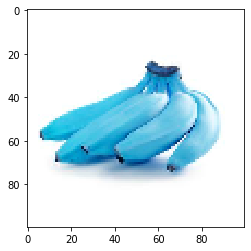

In [62]:
img_array = cv2.imread("./personal_test/banana.jpg", cv2.IMREAD_COLOR)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
img = new_array.astype('float32') / 255

In [63]:
pred = model.predict_classes(np.array([img]))
print(categories[int(pred)])

Banana


In [56]:
with open('categories.pkl', 'wb') as output:
    pickle.dump(categories, output, pickle.HIGHEST_PROTOCOL)